<a href="https://colab.research.google.com/github/Jems-Chawin/Rice-Classification-using-CNNs/blob/main/Rice_Image_Dataset_MobileNetV2_%26_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'rice-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2049052%2F3399185%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240307%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240307T085041Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D58235e751a7c19ef7394b7ea4e876d8acb62c6c7e604e68f46730e90344bfd2f3b729c4404b72fe8f920d31e1853dcec9a63380677525e83ee4ef1a266ffa77a715e35fc98bbac5a0e0469c7c3ea98b5681d22d382afc1a3b62ba04cb3729bacb58959ecd0afceb27a99a53f1ffc19f5f74c2e9389093a81063e1c82234fa5285b2775db0a3f1294f8d6f57b11173000ae618e5c5682f9441688c934201f920505c918d8764affd2454118ae523f79af6cf460900d5c3d88b3da4a776d08e67b229ff34ac7b102c0cf9426ebce8eff4e7348a55ba5722af628e625fab710f49570a9fa5f574ca811e9ddb34473c6283cff92600762e0ecc7acd0e6a4410f12e1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 230059472 bytes downloaded
Downloaded and uncompressed: rice-image-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (9147).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (6065).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (11807).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (250).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (7747).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (5395).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (2053).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (13983).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (3433).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (14055).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (7510).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (524).jpg


#**Import Libraries**

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import regularizers

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, MobileNetV2

from itertools import chain

from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow_io")

import pathlib
from splitfolders import ratio
import os

#**Parameters Setup**

In [ ]:
BATCH_SIZE = 64
image_height = 224
image_width = 224

# **Data Preprocess**

In [ ]:
base = '../input/rice-image-dataset/Rice_Image_Dataset'
base = pathlib.Path(base)

ratio(base, output='imgs', seed=123, ratio=(.7, .15, .15), group_prefix=None)

rice_classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
rice = [sorted(os.listdir(f'imgs/train/{class_name}')) for class_name in rice_classes]

image_count = len(list(base.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print('-'*30)
print(f'Total number of classes: {len(rice_classes)}')
print('-'*30)
rice_count = [len(rice_class) for rice_class in rice]
for class_name, count in zip(rice_classes, rice_count):
    print(f'Total {class_name} images: {count}')

Copying files: 75000 files [00:10, 7050.63 files/s]


Total images: 75000
------------------------------
Total number of classes: 5
------------------------------
Total Arborio images: 10500
Total Basmati images: 10500
Total Ipsala images: 10500
Total Jasmine images: 10500
Total Karacadag images: 10500


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = datagen.flow_from_directory(
    directory='imgs/train',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    directory='imgs/val',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    directory='imgs/test',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


Dictionary: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
Class labels: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


([<matplotlib.patches.Wedge at 0x7f2703cbc640>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Arborio'),
  Text(-0.3399187231970732, 1.046162158377023, 'Basmati'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'Ipsala'),
  Text(-0.33991862524830174, -1.0461621902025062, 'Jasmine'),
  Text(0.8899187482945414, -0.6465637025335375, 'Karacadag')],
 [Text(0.4854101933230228, 0.35267115592022213, '20%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

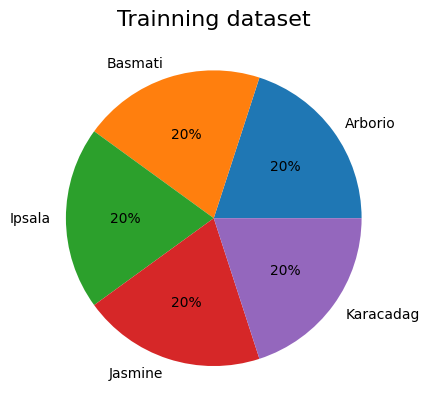

In [ ]:
dict_class = train_generator.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())
print('Class labels: {}'.format(class_names))

unique, counts = np.unique(train_generator.classes, return_counts=True)
plt.title("Trainning dataset", fontsize='16')
plt.pie(counts, labels = class_names, autopct='%1.0f%%')

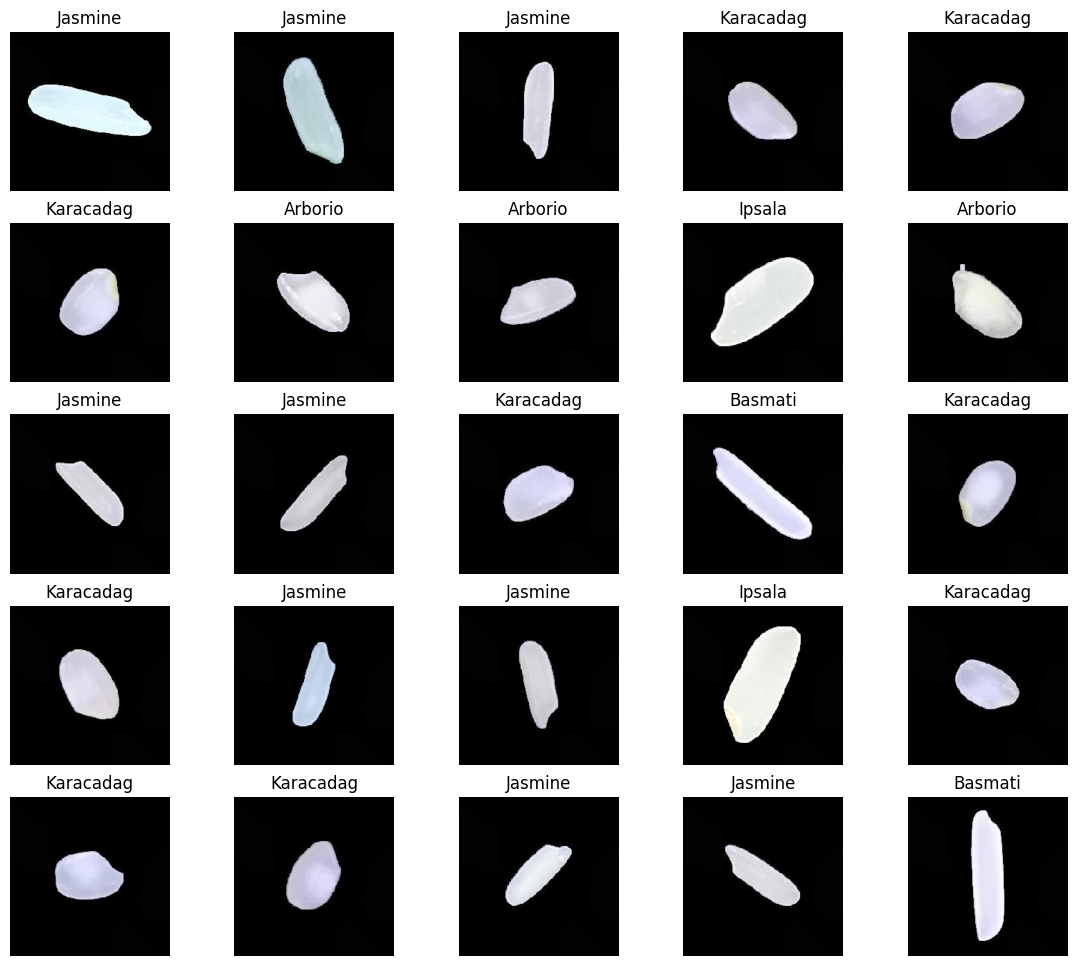

In [ ]:
img, label = next(train_generator)
plt.figure(figsize=[14, 12])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])
plt.show()

# **Model Creation (MobileNetV2)**

In [ ]:
EPOCHS = 10

model_name = "model_MobileNetV2.h5"

checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00000001)

In [ ]:
base_model_MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in base_model_MobileNetV2.layers:
    layer.trainable = False

model_MobileNetV2 = Sequential()
model_MobileNetV2.add(base_model_MobileNetV2)
model_MobileNetV2.add(GlobalAveragePooling2D())
model_MobileNetV2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_MobileNetV2.add(Dropout(0.2))
model_MobileNetV2.add(Dense(5, activation='softmax'))

# Model summary
print("Model Summary (MobileNetV2):")
model_MobileNetV2.summary()
print()

model_MobileNetV2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_MobileNetV2 = model_MobileNetV2.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=[checkpoint,earlystopping,reduce_lr])

9406464/9406464 [==============================] - 0s 0us/step
Model Summary (MobileNetV2):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 32)                40992     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


821/821 [==============================] - 105s 120ms/step - loss: 0.1807 - accuracy: 0.9568 - val_loss: 0.0890 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 2/10
821/821 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9795
Epoch 2: val_loss improved from 0.08904 to 0.07591, saving model to model_MobileNetV2.h5
821/821 [==============================] - 98s 120ms/step - loss: 0.0956 - accuracy: 0.9795 - val_loss: 0.0759 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 3/10
821/821 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9821
Epoch 3: val_loss improved from 0.07591 to 0.06444, saving model to model_MobileNetV2.h5
821/821 [==============================] - 98s 119ms/step - loss: 0.0855 - accuracy: 0.9821 - val_loss: 0.0644 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 4/10
821/821 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9832
Epoch 4: val_loss improved from 0.06444 to 0.06291, saving model to model_MobileNetV2.h5
821

In [ ]:
val_loss_MobileNetV2, val_accuracy_MobileNetV2 = model_MobileNetV2.evaluate(val_generator, steps=len(val_generator))
print(f'Validation Loss: {val_loss_MobileNetV2:.4f}')
print(f'Validation Accuracy: {val_accuracy_MobileNetV2:.4f}')

176/176 [==============================] - 17s 98ms/step - loss: 0.0612 - accuracy: 0.9879
Validation Loss: 0.0612
Validation Accuracy: 0.9879


## **Evaluation**


2/2 [==============================] - 1s 14ms/step


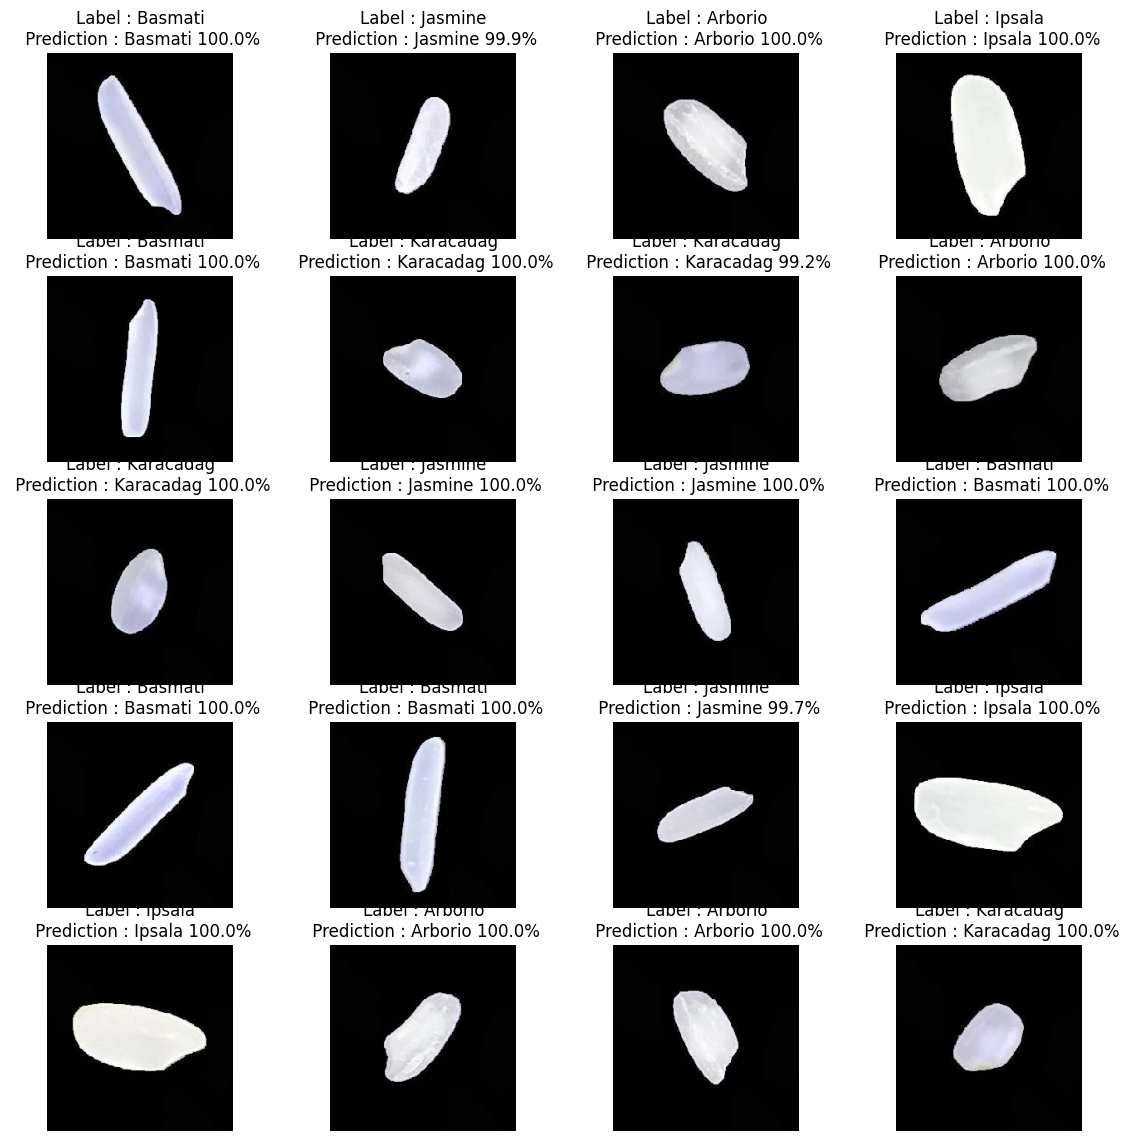

In [ ]:
val_generator.reset()
img, label = next(val_generator)

test_prediction = model_MobileNetV2.predict(img)
test_pred_classes = np.argmax(test_prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(test_prediction[i])))
plt.show()

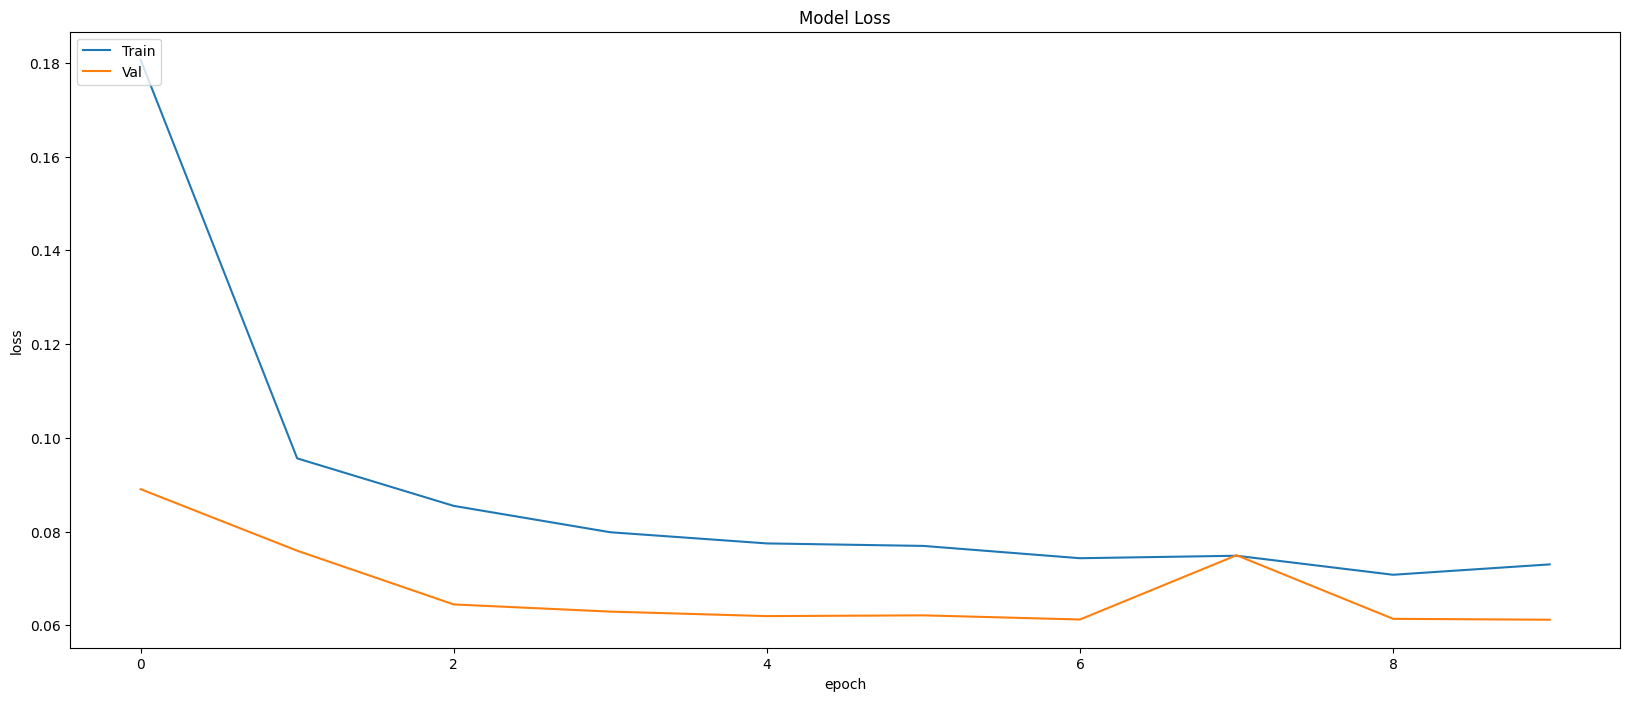

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history_MobileNetV2.history['loss'])
#plot the training loss over every epoch
plt.plot(history_MobileNetV2.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

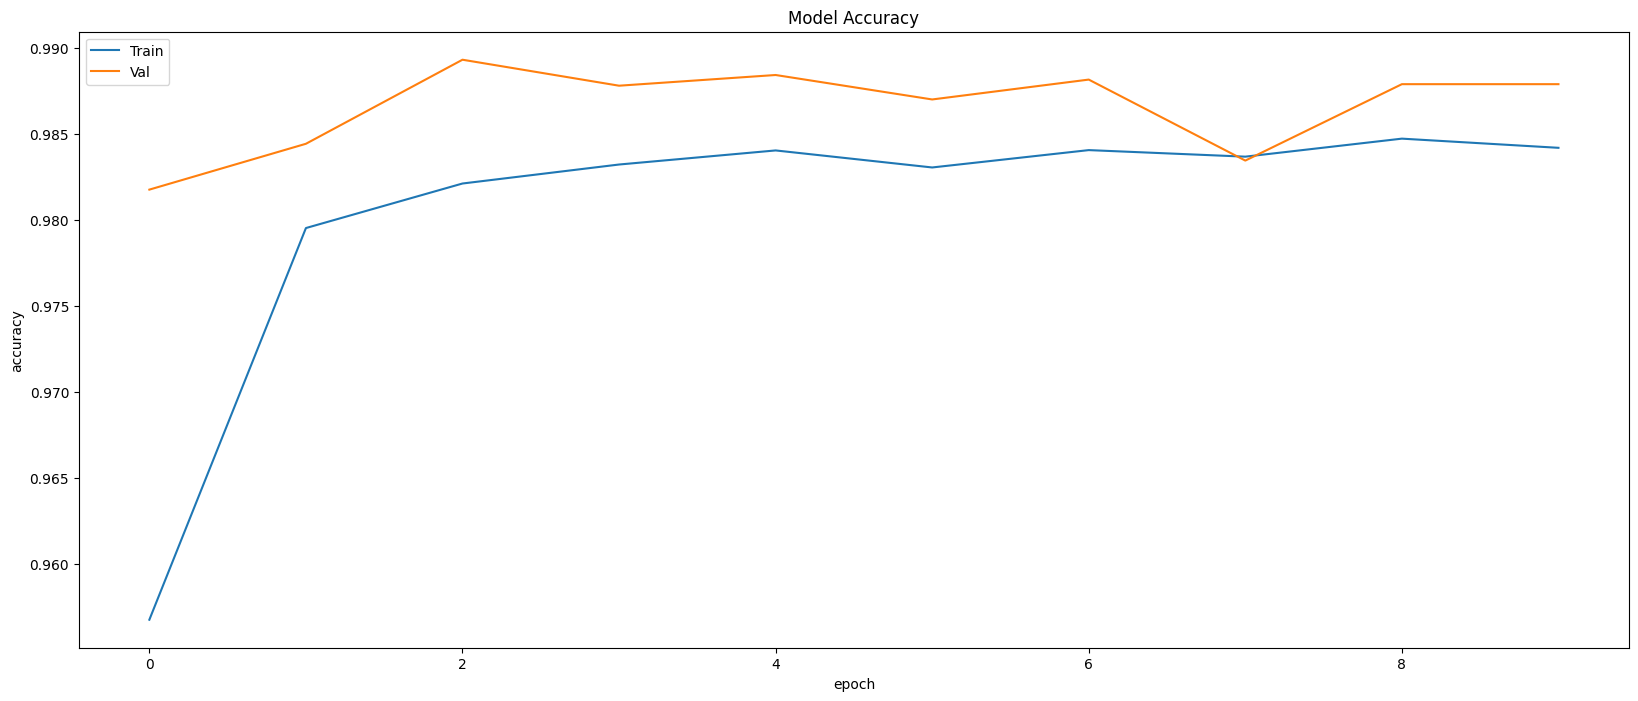

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history_MobileNetV2.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history_MobileNetV2.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

## **Save or Load the model**

In [ ]:
from keras.models import load_model
model_MobileNetV2.save('model_MobileNetV2.h5')
# model_path = "model_MobileNetV2 (1).h5"
# model_MobileNetV2 = load_model(model_path)
# model_MobileNetV2.summary()

## **Test with testing images**

In [ ]:
score = model_MobileNetV2.evaluate(test_generator, verbose=1)

176/176 [==============================] - 17s 98ms/step - loss: 0.0594 - accuracy: 0.9868


2/2 [==============================] - 0s 14ms/step


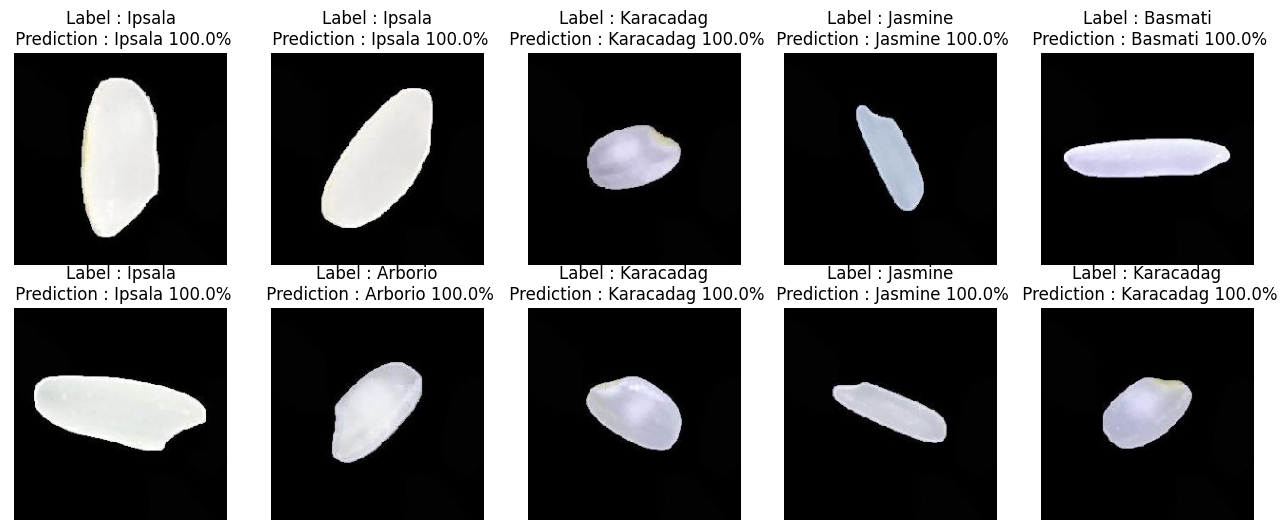

In [ ]:
from PIL import Image
try:
  img, label = next(test_generator)
except StopIteration:
  print("Test generator complete")

test_prediction = model_MobileNetV2.predict(img)
test_pred_class = np.argmax(test_prediction, axis=1)

plt.figure(figsize=[16, 16])
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(img[i])
  plt.axis('off')
  plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_class[i]], 100 * np.max(test_prediction[i])))
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory(
    directory='imgs/test',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 11250 images belonging to 5 classes.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# test_generator.reset()
y_pred = model_MobileNetV2.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

176/176 [==============================] - 18s 98ms/step


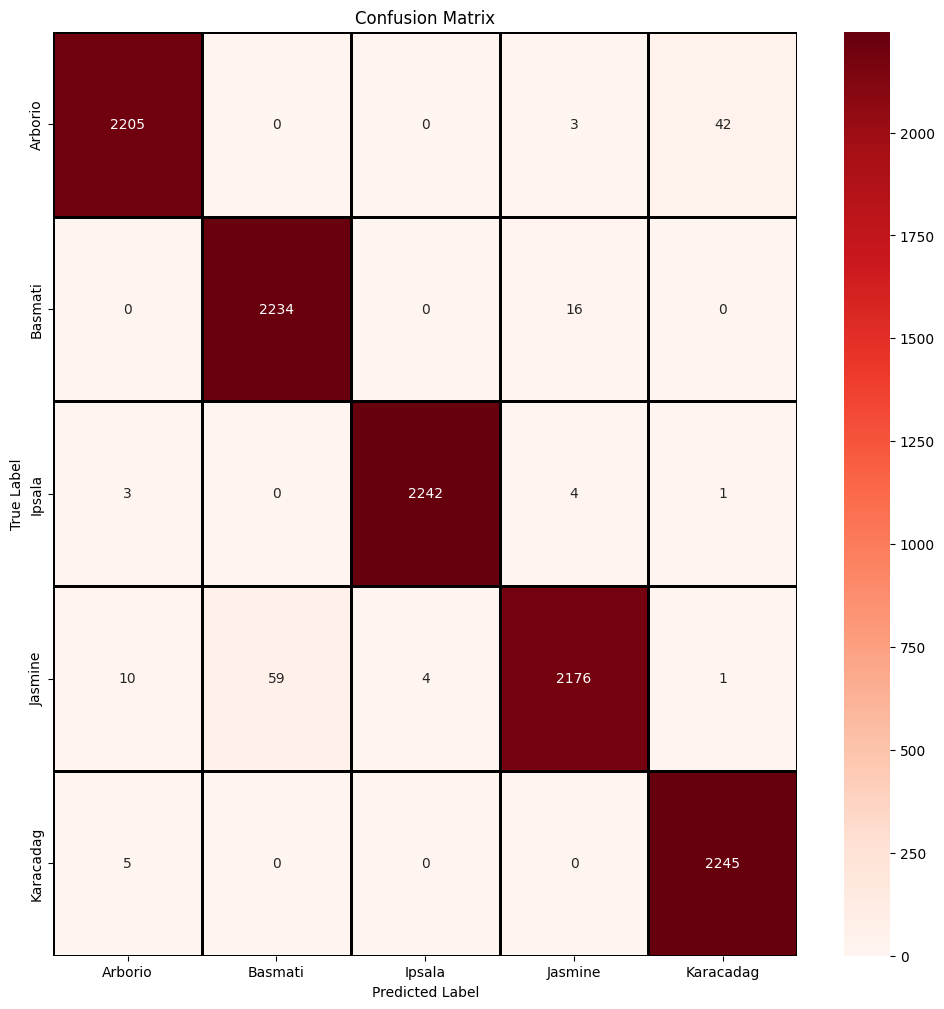

In [ ]:
confusion_mtx = confusion_matrix(test_generator.classes, y_pred_labels)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=1,
            linecolor="black",
            fmt='d',
            ax=ax,
            cmap="Reds")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_generator.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_generator.classes, sorted(y_pred_labels), target_names=rice_classes)
print(report)

              precision    recall  f1-score   support

     Arborio       1.00      0.99      0.99      2250
     Basmati       0.98      1.00      0.99      2250
      Ipsala       0.99      0.99      0.99      2250
     Jasmine       1.00      0.98      0.99      2250
   Karacadag       0.98      1.00      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



In [ ]:
train_generator.reset()
val_generator.reset()
test_generator.reset()

# **Model Creation (InceptionV3)**

In [ ]:
EPOCHS = 10

model_name = "model_InceptionV3.h5"

checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00000001)

In [ ]:
base_model_InceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in base_model_InceptionV3.layers:
    layer.trainable = False

model_InceptionV3 = Sequential()
model_InceptionV3.add(base_model_InceptionV3)
model_InceptionV3.add(GlobalAveragePooling2D())
model_InceptionV3.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_InceptionV3.add(Dropout(0.2))
model_InceptionV3.add(Dense(5, activation='softmax'))

# Model summary
print("Model Summary (InceptionV3):")
model_InceptionV3.summary()
print()

model_InceptionV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_InceptionV3 = model_InceptionV3.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=[checkpoint,earlystopping,reduce_lr])

87910968/87910968 [==============================] - 3s 0us/step
Model Summary (InceptionV3):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 21868517 (83.4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


821/821 [==============================] - 146s 166ms/step - loss: 0.1822 - accuracy: 0.9568 - val_loss: 0.0874 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 2/10
821/821 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9778
Epoch 2: val_loss improved from 0.08738 to 0.08120, saving model to model_InceptionV3.h5
821/821 [==============================] - 131s 159ms/step - loss: 0.1059 - accuracy: 0.9778 - val_loss: 0.0812 - val_accuracy: 0.9847 - lr: 0.0010
Epoch 3/10
821/821 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9796
Epoch 3: val_loss did not improve from 0.08120
821/821 [==============================] - 130s 159ms/step - loss: 0.0975 - accuracy: 0.9796 - val_loss: 0.0850 - val_accuracy: 0.9836 - lr: 0.0010
Epoch 4/10
821/821 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9762
Epoch 4: val_loss improved from 0.08120 to 0.07629, saving model to model_InceptionV3.h5
821/821 [==============================] - 

In [ ]:
val_loss_InceptionV3, val_accuracy_InceptionV3 = model_InceptionV3.evaluate(val_generator, steps=len(val_generator))
print(f'Validation Loss: {val_loss_InceptionV3:.4f}')
print(f'Validation Accuracy: {val_accuracy_InceptionV3:.4f}')

176/176 [==============================] - 23s 130ms/step - loss: 0.0734 - accuracy: 0.9863
Validation Loss: 0.0734
Validation Accuracy: 0.9863


2/2 [==============================] - 3s 19ms/step


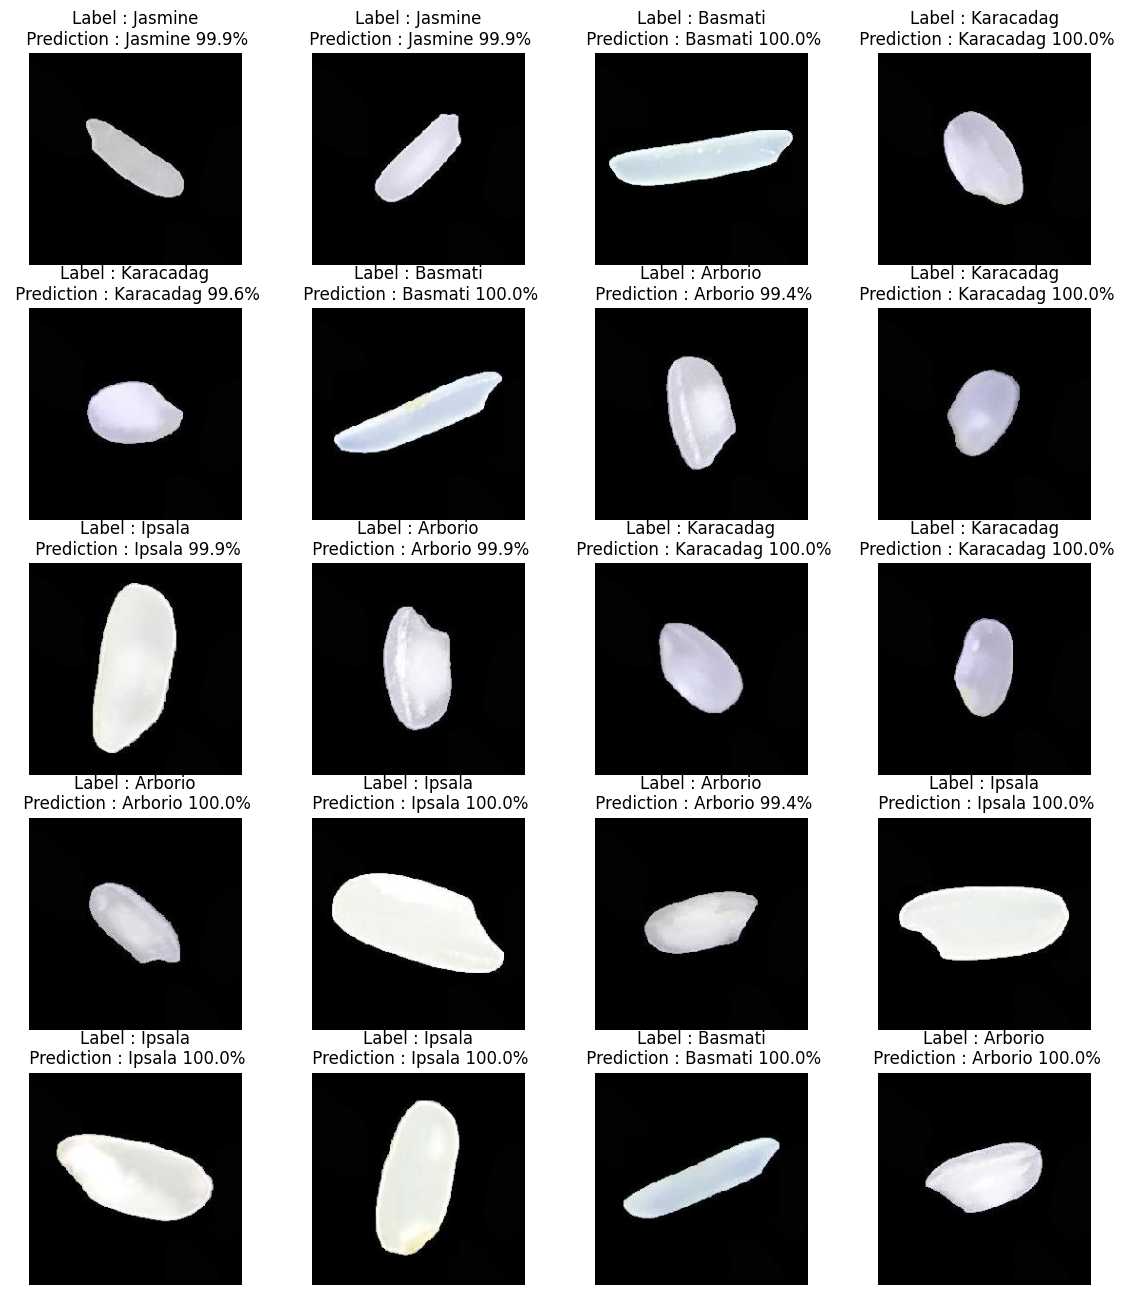

In [ ]:
val_generator.reset()
img, label = next(val_generator)

test_prediction = model_InceptionV3.predict(img)
test_pred_classes = np.argmax(test_prediction, axis=1)

plt.figure(figsize=[14, 16])
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(test_prediction[i])))
plt.show()

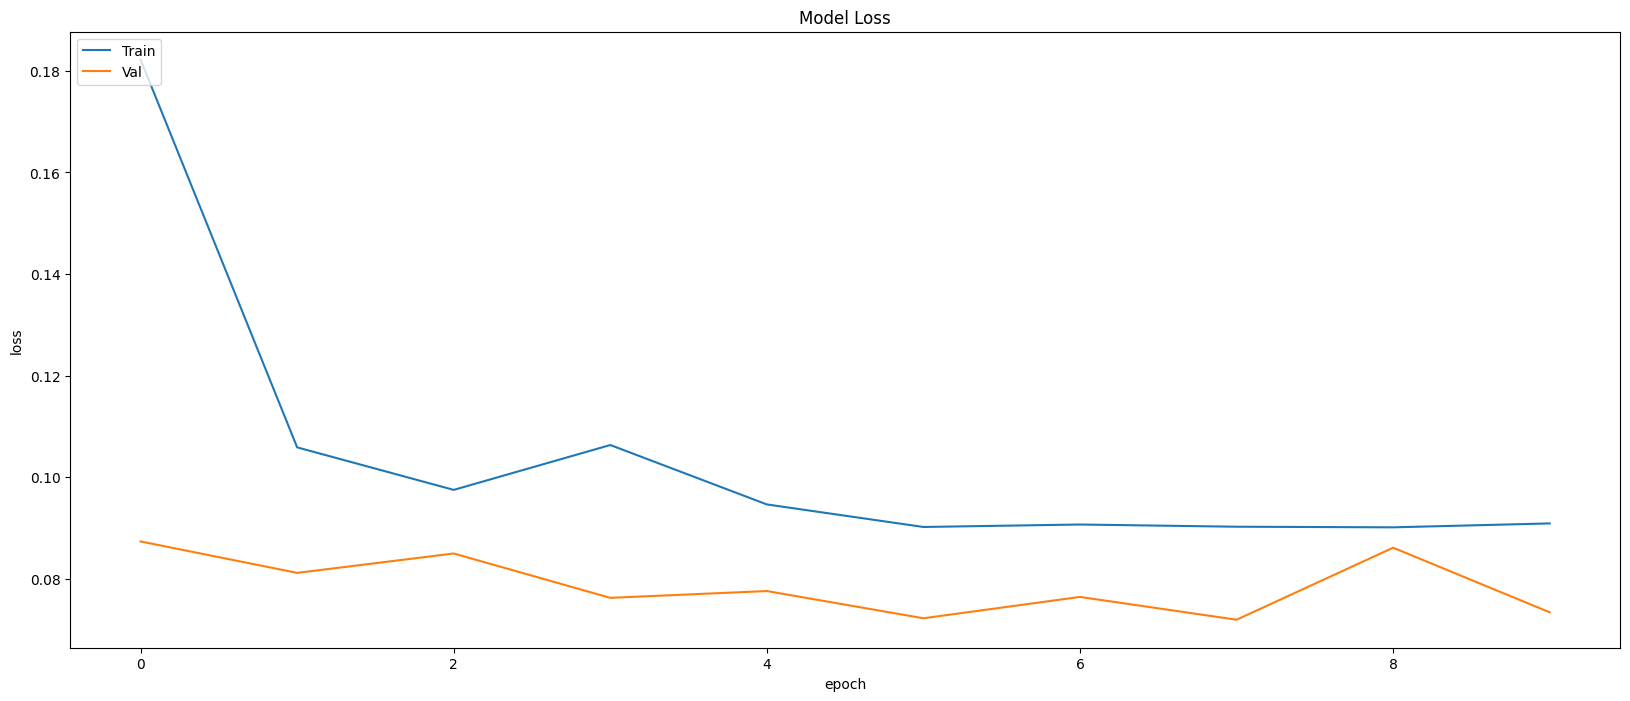

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history_InceptionV3.history['loss'])
#plot the training loss over every epoch
plt.plot(history_InceptionV3.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

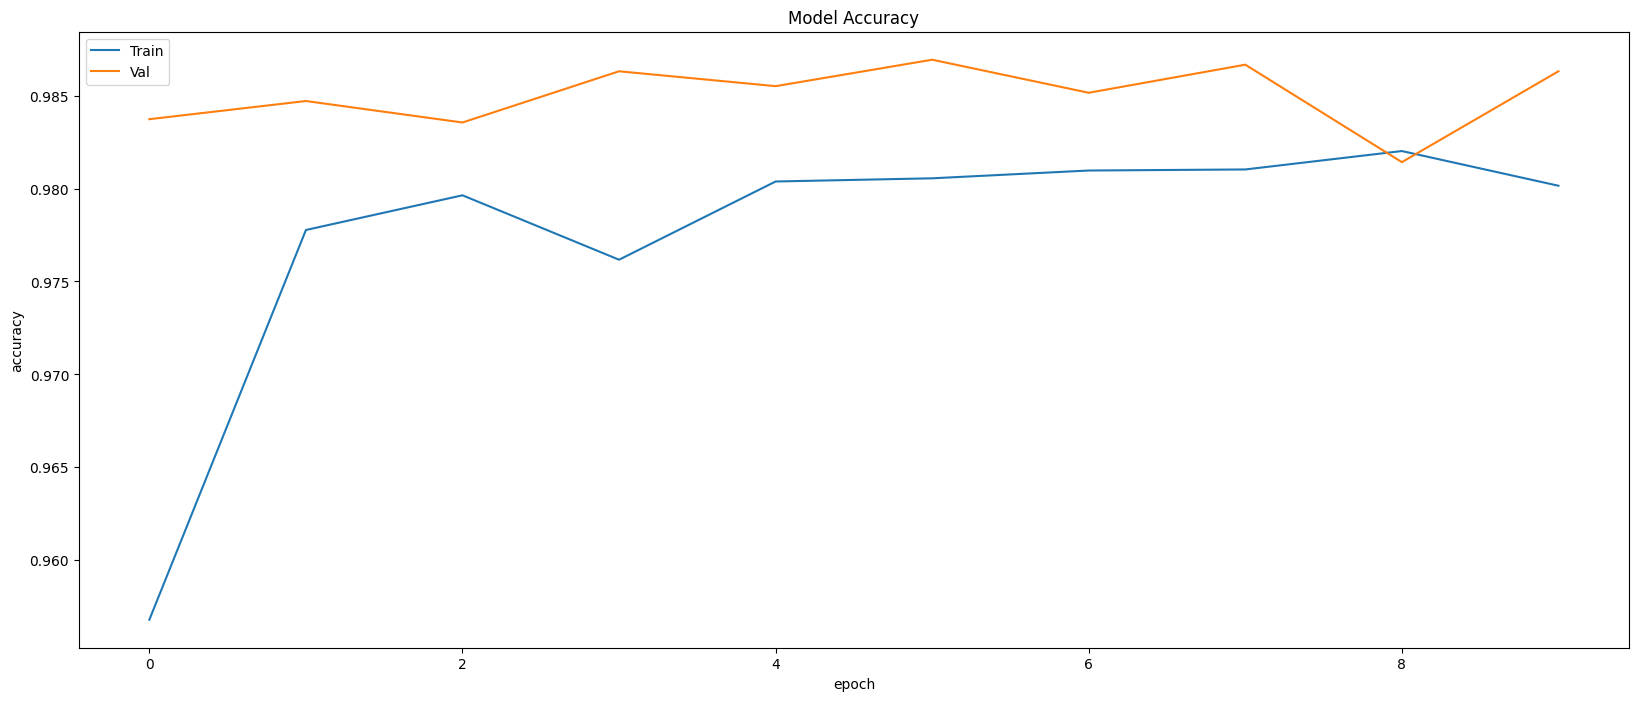

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history_InceptionV3.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history_InceptionV3.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
model_InceptionV3.save('model_InceptionV3.h5')
# model_path = "model_InceptionV3.h5"
# model_InceptionV3 = load_model(model_path)
# model_InceptionV3.summary()

In [ ]:
score = model_InceptionV3.evaluate(test_generator, verbose=1)

176/176 [==============================] - 23s 131ms/step - loss: 0.0664 - accuracy: 0.9889


2/2 [==============================] - 0s 29ms/step


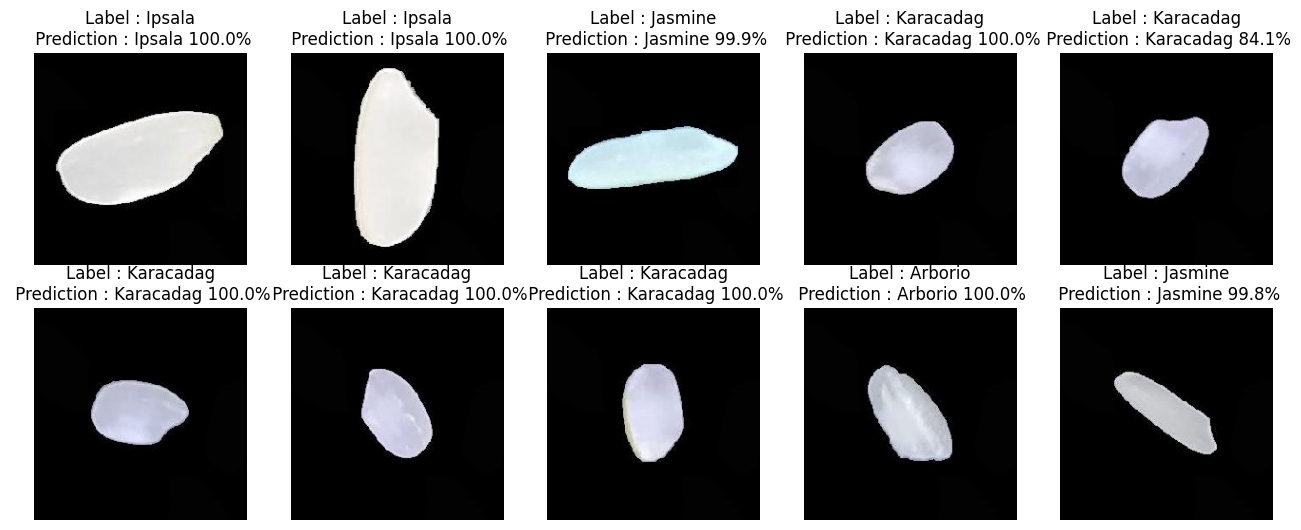

In [ ]:
from PIL import Image
try:
  img, label = next(test_generator)
except StopIteration:
  print("Test generator complete")

test_prediction = model_InceptionV3.predict(img)
test_pred_class = np.argmax(test_prediction, axis=1)

plt.figure(figsize=[16, 16])
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(img[i])
  plt.axis('off')
  plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_class[i]], 100 * np.max(test_prediction[i])))
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory(
    directory='imgs/test',
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 11250 images belonging to 5 classes.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# test_generator.reset()
y_pred = model_InceptionV3.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

176/176 [==============================] - 24s 130ms/step


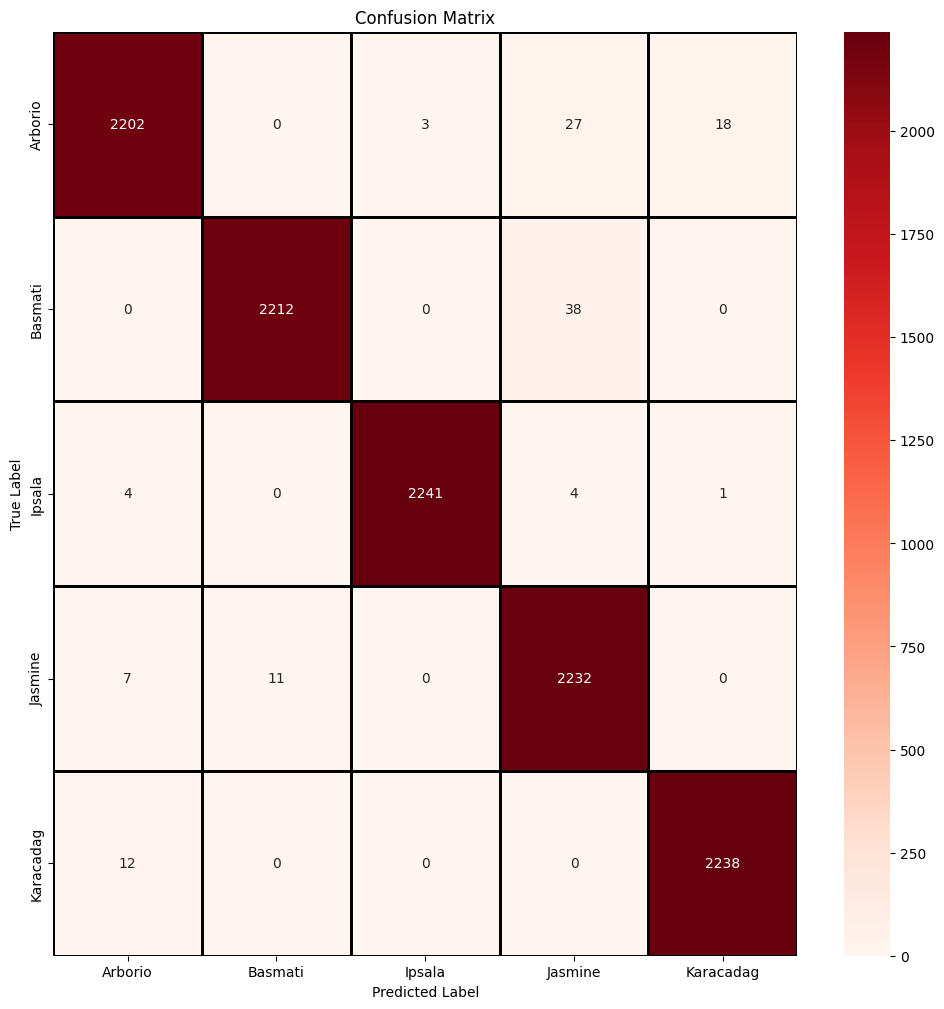

In [ ]:
confusion_mtx = confusion_matrix(test_generator.classes, y_pred_labels)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=1,
            linecolor="black",
            fmt='d',
            ax=ax,
            cmap="Reds")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_generator.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_generator.classes, sorted(y_pred_labels), target_names=rice_classes)
print(report)

              precision    recall  f1-score   support

     Arborio       1.00      0.99      0.99      2250
     Basmati       0.99      0.98      0.98      2250
      Ipsala       0.98      0.97      0.98      2250
     Jasmine       0.97      1.00      0.99      2250
   Karacadag       1.00      1.00      1.00      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250

